# Malware Image Classification with CNN
In this notebook I continue working the files harvested from the system32 directory on my machine. My goal is to collect a dataset containing at least 1K images of binary files. I will also try and capture a set that is in the range of 200 to 300 px in dimensions to reduce image distortion.

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('sys32imgs.csv', index_col=0)

In [5]:
df

,path,size,file_name,file_ext,dim,file_type
0,sys32imgs\07409496-a423-4a3e-b620-2cfb01a9318d...,8363,07409496-a423-4a3e-b620-2cfb01a9318d_HyperV-Co...,.png,91,dll
1,sys32imgs\0ae3b998-9a38-4b72-a4c4-06849441518d...,8383,0ae3b998-9a38-4b72-a4c4-06849441518d_Servicing...,.png,91,dll
2,sys32imgs\4545ffe2-0dc4-4df4-9d02-299ef204635e...,8433,4545ffe2-0dc4-4df4-9d02-299ef204635e_hvsocket....,.png,91,dll
3,sys32imgs\69fe178f-26e7-43a9-aa7d-2b616b672dde...,8379,69fe178f-26e7-43a9-aa7d-2b616b672dde_eventlogs...,.png,91,dll
4,sys32imgs\6bea57fb-8dfb-4177-9ae8-42e8b3529933...,8386,6bea57fb-8dfb-4177-9ae8-42e8b3529933_RuntimeDe...,.png,91,dll
...,...,...,...,...,...,...
6862,sys32imgs\{97C9A618-D40C-40EE-8563-8799D0DB987...,8105,{97C9A618-D40C-40EE-8563-8799D0DB9872}~mfencbd...,.png,90,cat
6863,sys32imgs\{A6CE337F-CBA5-412D-A06A-D872F2A8F08...,8105,{A6CE337F-CBA5-412D-A06A-D872F2A8F089}~mfencbd...,.png,90,cat
6864,sys32imgs\{AC93B605-EEAA-4818-9136-9EDA5489749...,6835,{AC93B605-EEAA-4818-9136-9EDA54897497}~mfencbd...,.png,82,cat
6865,sys32imgs\{C03C9921-D1C8-49D2-83C4-162FBC62CCA...,6814,{C03C9921-D1C8-49D2-83C4-162FBC62CCA8}~mfencrk...,.png,82,cat


Look for exe and dll file types from the lager data set. My goal is to find at minimum of 1K files that are within 200 to 300 px and are of type d.. or exe. I use the the query below to get my selection. 

In [13]:
qf = df.query("dim > 200 and dim < 300 and 'dll' in file_type or 'exe' in file_type")

In [17]:
qf['file_type'].value_counts()

dll    706
exe    586
Name: file_type, dtype: int64

In [18]:
qf

,path,size,file_name,file_ext,dim,file_type
26,sys32imgs\aadjcsp.dll.png,47300,aadjcsp.dll.png,.png,217,dll
41,sys32imgs\acppage.dll.png,85291,acppage.dll.png,.png,292,dll
43,sys32imgs\AcSpecfc.dll.png,50664,AcSpecfc.dll.png,.png,225,dll
45,sys32imgs\ActionCenterCPL.dll.png,79046,ActionCenterCPL.dll.png,.png,281,dll
52,sys32imgs\ActiveSyncCsp.dll.png,71006,ActiveSyncCsp.dll.png,.png,266,dll
...,...,...,...,...,...,...
6851,sys32imgs\XpsToPwgrConverter.dll.png,47862,XpsToPwgrConverter.dll.png,.png,218,dll
6853,sys32imgs\xwizard.exe.png,43502,xwizard.exe.png,.png,208,exe
6855,sys32imgs\xwreg.dll.png,72949,xwreg.dll.png,.png,270,dll
6857,sys32imgs\xwtpw32.dll.png,85088,xwtpw32.dll.png,.png,291,dll


As shown above I have a good mix of binary type files that are dimenionally similar which should minimally impact image clarity when resizing for CNN. 

## Prepare Selection
Now that I've identified my binary files. I will create a hash feature for each file should I need to identify the source file at a later time. Then I will continue to process my data set for training with a CNN. 

In [19]:
import hashlib
 
# initializing string
str2hash = "GeeksforGeeks"
 
# encoding GeeksforGeeks using encode()
# then sending to md5()
result = hashlib.md5(str2hash.encode())
 
# printing the equivalent hexadecimal value.
print("The hexadecimal equivalent of hash is : ", end ="")
print(result.hexdigest())

The hexadecimal equivalent of hash is : f1e069787ece74531d112559945c6871


In [23]:
def hashFile(path):
    return hashlib.md5(open(path,'rb').read()).hexdigest()

In [25]:
qf['md5'] = qf['path'].apply(lambda x: hashFile(x))
qf

C:\Users\genem\AppData\Local\Temp\ipykernel_13632\3075359266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qf['md5'] = qf['path'].apply(lambda x: hashFile(x))


,path,size,file_name,file_ext,dim,file_type,md5
26,sys32imgs\aadjcsp.dll.png,47300,aadjcsp.dll.png,.png,217,dll,9f1d09153b02cc23b8a2a6fb9a00954a
41,sys32imgs\acppage.dll.png,85291,acppage.dll.png,.png,292,dll,1bebd7aa38f7d06aaa58ab8541540cee
43,sys32imgs\AcSpecfc.dll.png,50664,AcSpecfc.dll.png,.png,225,dll,e05de3d9f75679086e61ea37435d4916
45,sys32imgs\ActionCenterCPL.dll.png,79046,ActionCenterCPL.dll.png,.png,281,dll,a7bd90244bf99f3b49ca776cc430027f
52,sys32imgs\ActiveSyncCsp.dll.png,71006,ActiveSyncCsp.dll.png,.png,266,dll,a14d43d35eb7db27d344011bf2319553
...,...,...,...,...,...,...,...
6851,sys32imgs\XpsToPwgrConverter.dll.png,47862,XpsToPwgrConverter.dll.png,.png,218,dll,78f9751c86bf8098f3496cec97843f14
6853,sys32imgs\xwizard.exe.png,43502,xwizard.exe.png,.png,208,exe,deb694b9fedb0b84841cfd18af3d275a
6855,sys32imgs\xwreg.dll.png,72949,xwreg.dll.png,.png,270,dll,c345ef4c5f4182ffd98c13993fe48889
6857,sys32imgs\xwtpw32.dll.png,85088,xwtpw32.dll.png,.png,291,dll,e0a25842d74146225aea7a4677bf2ad0


In [26]:
qf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 26 to 6858
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       1292 non-null   object
 1   size       1292 non-null   int64 
 2   file_name  1292 non-null   object
 3   file_ext   1292 non-null   object
 4   dim        1292 non-null   int64 
 5   file_type  1292 non-null   object
 6   md5        1292 non-null   object
dtypes: int64(2), object(5)
memory usage: 80.8+ KB


Check to make sure everything got hashed.

In [29]:
qf.isna().value_counts()

path   size   file_name  file_ext  dim    file_type  md5  
False  False  False      False     False  False      False    1292
dtype: int64

In [30]:
qf.to_csv('bFileSelection.csv')

## Continue Processing

In [70]:
df = pd.read_csv('bFileSelection.csv', index_col=0)
df

,path,size,file_name,file_ext,dim,file_type,md5
26,sys32imgs\aadjcsp.dll.png,47300,aadjcsp.dll.png,.png,217,dll,9f1d09153b02cc23b8a2a6fb9a00954a
41,sys32imgs\acppage.dll.png,85291,acppage.dll.png,.png,292,dll,1bebd7aa38f7d06aaa58ab8541540cee
43,sys32imgs\AcSpecfc.dll.png,50664,AcSpecfc.dll.png,.png,225,dll,e05de3d9f75679086e61ea37435d4916
45,sys32imgs\ActionCenterCPL.dll.png,79046,ActionCenterCPL.dll.png,.png,281,dll,a7bd90244bf99f3b49ca776cc430027f
52,sys32imgs\ActiveSyncCsp.dll.png,71006,ActiveSyncCsp.dll.png,.png,266,dll,a14d43d35eb7db27d344011bf2319553
...,...,...,...,...,...,...,...
6851,sys32imgs\XpsToPwgrConverter.dll.png,47862,XpsToPwgrConverter.dll.png,.png,218,dll,78f9751c86bf8098f3496cec97843f14
6853,sys32imgs\xwizard.exe.png,43502,xwizard.exe.png,.png,208,exe,deb694b9fedb0b84841cfd18af3d275a
6855,sys32imgs\xwreg.dll.png,72949,xwreg.dll.png,.png,270,dll,c345ef4c5f4182ffd98c13993fe48889
6857,sys32imgs\xwtpw32.dll.png,85088,xwtpw32.dll.png,.png,291,dll,e0a25842d74146225aea7a4677bf2ad0


I'll setup to resize images to 200x200.

In [40]:
# Importing Image class from PIL module 
from PIL import Image 
 
# Opens a image in RGB mode 
im = Image.open(r"imgs\7z.exe.png")
newsize = (200, 200)
im1 = im.resize(newsize)
im.show()
im1.show()

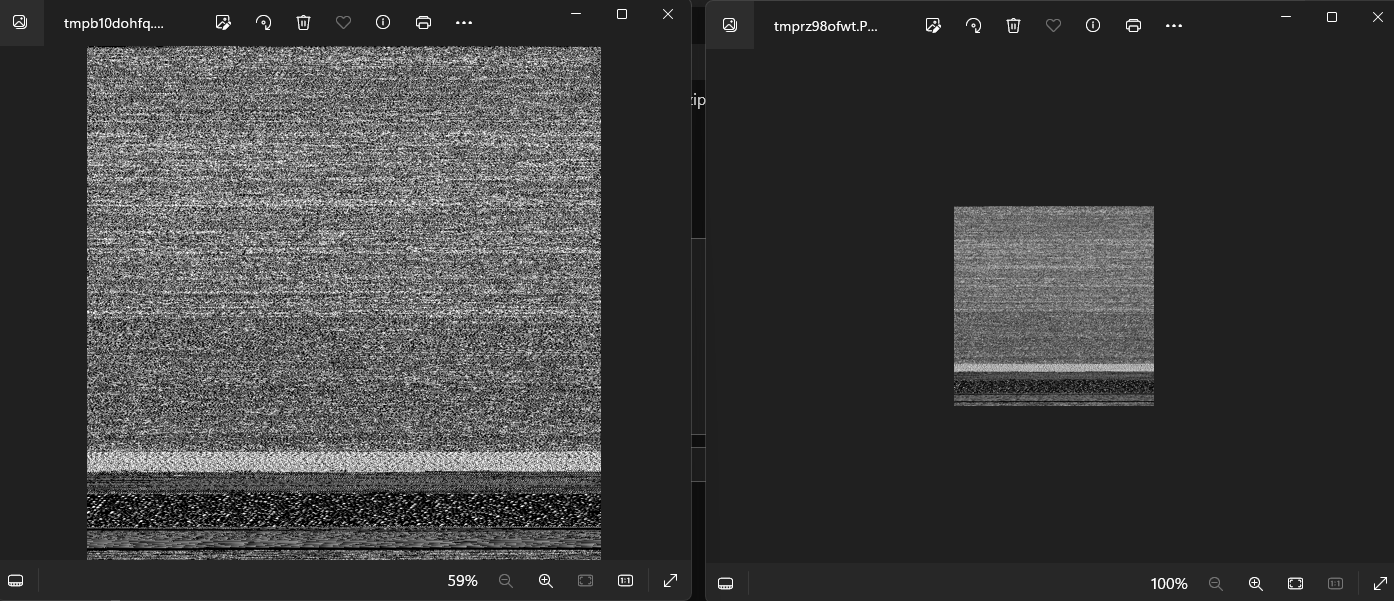

This method taken from [1] looks like it will do the job.

In [68]:
import pathlib
def resizeIM(im_path, save_path, file_name):
    try:
        # Opens a image in RGB mode
        im = Image.open(im_path)
        newsize = (200, 200)
        im1 = im.resize(newsize)
        file_name = str(file_name) + '.png'
        save_path = save_path + "\\" + pathlib.PureWindowsPath(file_name).name
        im1.save(save_path)
    except Exception as e:
        print(e)
    
    

In [56]:
resizeIM(r"imgs\7z.exe.png", "bFiles", 1)

In [71]:
counter = 0
for index, row in df.iterrows():
    path = row['path']
    resizeIM(path, "bFiles", index)
    counter += 1
print(counter)

Image size (189695529 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
1292


**Note:** there must be a bug in the PIL library because I was able to resize all images by handling an exception even though an exception was raised. Also, I tried to print im_path as part of my error handling but it said that im_path was not defined. So this leads me to believe the exception is raised but not in correlation to an actual file input. It could be something if ipkernel but not sure.

# Reference
1 Python PIL. (2019, July 16). GeeksforGeeks. https://www.geeksforgeeks.org/python-pil-image-resize-method/

